# **Data Preprocessing**

Week 2 MLP

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style = "whitegrid")

## Feature Extraction

DictVectorizer -  list of dict objects to feature matrix

In [ ]:
data = [{'age': 4, 'height': 96.0},
        {'age': 1, 'height': 73.9},
        {'age': 3, 'height': 88.9},
        {'age': 2, 'height': 81.6}]

In [ ]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse = False)
data_transformed = dv.fit_transform(data)   #fit learns, transform actually transforms
data_transformed

array([[ 4. , 96. ],
       [ 1. , 73.9],
       [ 3. , 88.9],
       [ 2. , 81.6]])

In [ ]:
data_transformed.shape

(4, 2)

Data Imputation - replaces missing using mean/median/mode....

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
#heart disease data set
cols =[ 'age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
heart_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', header = None, names = cols)

In [ ]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [ ]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [ ]:
print("Unique ca: ", heart_data.ca.unique())
print("Unique thal: ", heart_data.thal.unique())

Unique ca:  ['0.0' '3.0' '2.0' '1.0' '?']
Unique thal:  ['6.0' '3.0' '7.0' '?']


In [ ]:
print("#missing in ca:", heart_data.loc[heart_data.ca=='?','ca'].count())
print("#missing in thal:", heart_data.loc[heart_data.thal=='?','thal'].count())

#missing in ca: 4
#missing in thal: 2


In [ ]:
#replace ? with nan
heart_data.replace('?', np.nan, inplace = True)

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean')
imputer = imputer.fit(heart_data)
heart_data_imputed = imputer.transform(heart_data)
print(heart_data_imputed.shape)

(303, 14)


In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean', add_indicator = True)   # additional cols added (add_indicator) if true indicates initial val was missing
imputer = imputer.fit(heart_data)
heart_data_imputed = imputer.transform(heart_data)
print(heart_data_imputed.shape)

(303, 16)


Feature Scaling

In [ ]:
#Ablone dataset
cols = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
ablone_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data',header = None, names = cols)

In [ ]:
ablone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
ablone_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
ablone_data.Sex.unique()

array(['M', 'F', 'I'], dtype=object)

In [ ]:
ablone_data = ablone_data.replace({"Sex":{"M": 1, "F": 2, "I": 3}})
ablone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


In [ ]:
y = ablone_data.pop("Rings")   #pop the label
print("The DF object after deleting the col")
ablone_data.info()

The DF object after deleting the col
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


In [ ]:
ablone_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,4177.0,1.955470,0.827815,1.0000,1.0000,2.0000,3.000,3.0000
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050


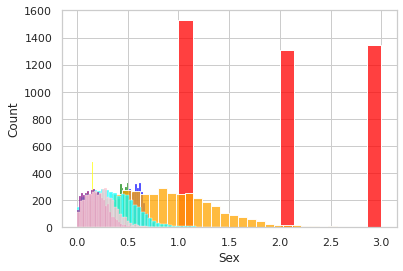

In [ ]:
# ablone_data_view = sns.load_dataset(ablone_data)
sns.histplot(data=ablone_data, x="Sex",color = 'red')
sns.histplot(data=ablone_data, x="Length",color = 'blue')
sns.histplot(data=ablone_data, x="Diameter", color = 'green')
sns.histplot(data=ablone_data, x="Height", color = 'yellow')
sns.histplot(data=ablone_data, x="Whole weight", color = 'orange')
sns.histplot(data=ablone_data, x="Shucked weight", color = 'cyan')
sns.histplot(data=ablone_data, x="Viscera weight", color = 'purple')
sns.histplot(data=ablone_data, x="Shell weight", color = 'pink')

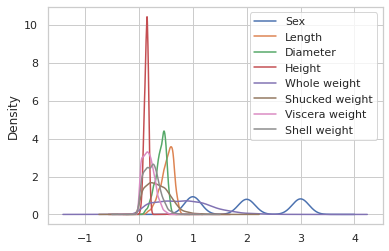

In [ ]:
ax = ablone_data.plot.kde()    #kernel density

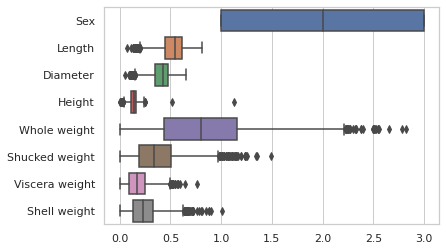

In [ ]:
sns.boxplot(data = ablone_data, orient = "h")       #orient to change orientation - horizontal/vertical

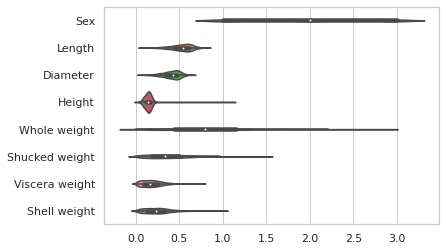

In [ ]:
sns.violinplot(data = ablone_data, orient = "h")   #KDE + boxplot

In [ ]:
# MaxAbsScaler

x = np.array([4,2,5,-2,-100]).reshape(-1,1)     #reshape to take transpose
x

array([[   4],
       [   2],
       [   5],
       [  -2],
       [-100]])

In [ ]:
#MinMaxScalar - range 0-1
from sklearn.preprocessing import MaxAbsScaler
x = ablone_data
mas = MaxAbsScaler()
x_new = mas.fit_transform(x)
print(x_new[:5])

[[0.33333333 0.55828221 0.56153846 0.0840708  0.18191471 0.15087366
  0.13289474 0.14925373]
 [0.33333333 0.42944785 0.40769231 0.07964602 0.07980888 0.06686828
  0.06381579 0.06965174]
 [0.66666667 0.65030675 0.64615385 0.11946903 0.23960361 0.17237903
  0.18618421 0.20895522]
 [0.33333333 0.5398773  0.56153846 0.11061947 0.18262254 0.14482527
  0.15       0.15422886]
 [1.         0.40490798 0.39230769 0.07079646 0.07255353 0.06014785
  0.05197368 0.05472637]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
x = ablone_data
mms = MinMaxScaler()
x_new = mms.fit_transform(x)
print(x_new[:5])

[[0.         0.51351351 0.5210084  0.0840708  0.18133522 0.15030262
  0.1323239  0.14798206]
 [0.         0.37162162 0.35294118 0.07964602 0.07915707 0.06624075
  0.06319947 0.06826109]
 [0.5        0.61486486 0.61344538 0.11946903 0.23906499 0.17182246
  0.18564845 0.2077728 ]
 [0.         0.49324324 0.5210084  0.11061947 0.18204356 0.14425017
  0.14944042 0.15296462]
 [1.         0.34459459 0.33613445 0.07079646 0.07189658 0.0595158
  0.05134957 0.0533134 ]]


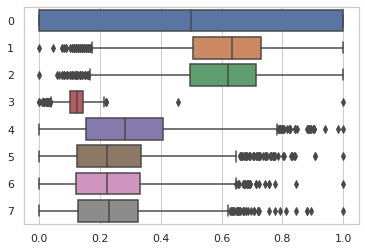

In [ ]:
sns.boxplot(data = x_new, orient = "h")   # range now between 0 and 1

In [ ]:
#StandardScalar
from sklearn.preprocessing import StandardScaler
x = ablone_data
mms = StandardScaler()
x_new = mms.fit_transform(x)
print(x_new[:5])

[[-1.15434629 -0.57455813 -0.43214879 -1.06442415 -0.64189823 -0.60768536
  -0.72621157 -0.63821689]
 [-1.15434629 -1.44898585 -1.439929   -1.18397831 -1.23027711 -1.17090984
  -1.20522124 -1.21298732]
 [ 0.05379815  0.05003309  0.12213032 -0.10799087 -0.30946926 -0.4634999
  -0.35668983 -0.20713907]
 [-1.15434629 -0.69947638 -0.43214879 -0.34709919 -0.63781934 -0.64823753
  -0.60759966 -0.60229374]
 [ 1.26194258 -1.61554351 -1.54070702 -1.42308663 -1.27208566 -1.2159678
  -1.28733718 -1.32075677]]


In [ ]:
x_new.mean(axis = 0)      # almost 0 ???

array([-1.19075871e-17, -5.83471770e-16, -3.02792930e-16,  3.91249292e-16,
        8.84563616e-17,  3.40216776e-18,  6.80433551e-18,  2.89184259e-16])

In [ ]:
x_new.std(axis = 0)  #std now 1

array([1., 1., 1., 1., 1., 1., 1., 1.])

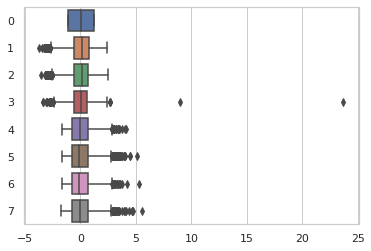

In [ ]:
sns.boxplot(data = x_new, orient = "h")     #mean = 0 and std = 1

Add Dummy Feature

In [ ]:
x = np.array([4,2,5,-2,-100]).reshape(-1,1) 

from sklearn.preprocessing import add_dummy_feature

x_new_dummy = add_dummy_feature(x)
x_new_dummy

array([[   1.,    4.],
       [   1.,    2.],
       [   1.,    5.],
       [   1.,   -2.],
       [   1., -100.]])

Custom Transformers

In [ ]:
from sklearn.preprocessing import FunctionTransformer


In [ ]:

wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep = ";")

In [ ]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [ ]:
transformer = FunctionTransformer(np.log1p, validate = True)  #np.log1p->log(1+feature value)
wine_data_transformed = transformer.transform(np.array(wine_data))
pd.DataFrame(wine_data_transformed, columns = wine_data.columns).describe().T
#nlog(1+val) for all values

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,2.215842,0.178100,1.722767,2.091864,2.186051,2.322388,2.827314
volatile acidity,1599.0,0.417173,0.114926,0.113329,0.329304,0.418710,0.494696,0.947789
citric acid,1599.0,0.228147,0.152423,0.000000,0.086178,0.231112,0.350657,0.693147
residual sugar,1599.0,1.218131,0.269969,0.641854,1.064711,1.163151,1.280934,2.803360
chlorides,1599.0,0.083038,0.038991,0.011929,0.067659,0.076035,0.086178,0.476855
free sulfur dioxide,1599.0,2.639013,0.623790,0.693147,2.079442,2.708050,3.091042,4.290459
total sulfur dioxide,1599.0,3.634750,0.682575,1.945910,3.135494,3.663562,4.143135,5.669881
density,1599.0,0.691519,0.000945,0.688170,0.690945,0.691521,0.692064,0.694990
pH,1599.0,1.460557,0.035760,1.319086,1.437463,1.460938,1.481605,1.611436
sulphates,1599.0,0.501073,0.093731,0.285179,0.438255,0.482426,0.548121,1.098612


Polynomial Features

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:

wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep = ";")
wine_data_copy = wine_data.copy()
wine_data = wine_data.drop(['quality'], axis = 1)
print("Before shape", wine_data.shape)

#fitting poly of deg 2 to 
poly = PolynomialFeatures(degree = 2)
poly_wine_data = poly.fit_transform(wine_data)
print("After shape", poly_wine_data.shape)

Before shape (1599, 11)
After shape (1599, 78)


In [ ]:
poly.get_feature_names_out()

array(['1', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'fixed acidity^2', 'fixed acidity volatile acidity',
       'fixed acidity citric acid', 'fixed acidity residual sugar',
       'fixed acidity chlorides', 'fixed acidity free sulfur dioxide',
       'fixed acidity total sulfur dioxide', 'fixed acidity density',
       'fixed acidity pH', 'fixed acidity sulphates',
       'fixed acidity alcohol', 'volatile acidity^2',
       'volatile acidity citric acid', 'volatile acidity residual sugar',
       'volatile acidity chlorides',
       'volatile acidity free sulfur dioxide',
       'volatile acidity total sulfur dioxide',
       'volatile acidity density', 'volatile acidity pH',
       'volatile acidity sulphates', 'volatile acidity alcohol',
       'citric acid^2', 'citric acid residual sugar',
       'citric acid chlorides', 'citric aci

Discretization

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
# continuos variables - bins
wine_data = wine_data_copy.copy()

enc = KBinsDiscretizer(n_bins = 10, encode = "onehot")
X = np.array(wine_data["chlorides"]).reshape(-1,1)
X_binned = enc.fit_transform(X)

In [ ]:
X_binned.toarray()[:5]      #sparse matrix

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

Handling Categorical Features

In [ ]:
#Ordinal Encoding - Punjab ->1, Rajasthan->2.....
#One-hot Encoding

from sklearn.preprocessing  import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
cols = ['sepal length','sepal width','petal length','petal width','label']
iris_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None, names = cols)
iris_data.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_data.label.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
onehotencoder = OneHotEncoder(categories = 'auto')
print("Shape of y before encoding", iris_data.label.shape)

iris_labels = onehotencoder.fit_transform(iris_data.label.values.reshape(-1,1))  #reshape to pass 2d array

print("Shape after encoding", iris_labels.shape)

print("First 5 labels")
print(iris_labels.toarray()[:5])

Shape of y before encoding (150,)
Shape after encoding (150, 3)
First 5 labels
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
enc = OrdinalEncoder()
iris_labels = np.array(iris_data['label'])

iris_labels_transformed = enc.fit_transform(iris_labels.reshape(-1,1))
print("Unique labels: ", np.unique(iris_labels_transformed))

print("First 5 labels")
print(iris_labels_transformed[:5])

Unique labels:  [0. 1. 2.]
First 5 labels
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
iris_labels = np.array(iris_data['label'])

enc = LabelEncoder()
label_integer = enc.fit_transform(iris_labels)
label_integer                  #similar result to OrdinalEncoder

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

 MultilabelBinarizer

In [ ]:
#encodes categorical 0 to k-1


In [ ]:
movie_genres = [{'action','comedy'},
                {'comedy'},
                {'action','thriller'},
                {'scifi','action','thriller'}]

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb.fit_transform(movie_genres)
#kind of onehot encoding on multi

array([[1, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 1],
       [1, 0, 1, 1]])

Using dummy variables

In [ ]:
#converts categorical to onehot
iris_data_onehot = pd.get_dummies(iris_data, columns = ['label'], prefix = ['one_hot'])
iris_data_onehot

,sepal length,sepal width,petal length,petal width,one_hot_Iris-setosa,one_hot_Iris-versicolor,one_hot_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


Composite Transformers

In [ ]:
x = [
     [20.0, 'male'],
     [10.0, 'female']
]

x = np.array(x)
x

array([['20.0', 'male'],
       ['10.0', 'female']], dtype='<U32')

In [ ]:
# for heterogenous transforms - 2 diff types of preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MaxAbsScaler, OneHotEncoder

ct = ColumnTransformer([('scalar', MaxAbsScaler(),[0]),
                        ('pass', 'passthrough',[0]),   #show original of first col
                        ('encoder', OneHotEncoder(), [1])])
ct.fit_transform(x)


array([['1.0', '20.0', '0.0', '1.0'],
       ['0.5', '10.0', '1.0', '0.0']], dtype='<U32')

TransformedTargetRegressor

In [ ]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

X,y = fetch_california_housing(return_X_y = True)
X,y = X[:2000,:], y[:2000]

transformer = MaxAbsScaler()

regressor = LinearRegression()

regr = TransformedTargetRegressor(regressor = regressor, transformer = transformer)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)
regr.fit(X_train, y_train)

print("R2 score of raw label regression: {0:.2f}".format(regr.score(X_test, y_test)))

raw_target_regr = LinearRegression().fit(X_train, y_train)
print("R2 score of tramsformed label regression: {0:.2f}".format(raw_target_regr.score(X_test, y_test)))



R2 score of raw label regression: 0.59
R2 score of tramsformed label regression: 0.59


## **Feature Selection**

In [ ]:
data = [{'age': 4, 'height': 96.0},
        {'age': 1, 'height': 73.9},
        {'age': 3, 'height': 88.9},
        {'age': 2, 'height': 81.6}]

from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse = False)
data_transformed = dv.fit_transform(data)   #fit learns, transform actually transforms
np.var(data_transformed, axis = 0)

array([ 1.25 , 67.735])

In [ ]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold = 9)
data_new = vt.fit_transform(data_transformed)
data_new

array([[96. ],
       [73.9],
       [88.9],
       [81.6]])

SelectKBest

In [ ]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_regression
X_california, y_california = fetch_california_housing(return_X_y = True)

X,y = X_california[:2000,:], y_california[:2000]

print(f'Shape of feature matrix: {X.shape}')

Shape of feature matrix: (2000, 8)


In [ ]:
#select top 3 best features
skb = SelectKBest(mutual_info_regression, k = 3)         #mutual_info_regression-scoring function
X_new = skb.fit_transform(X,y)
print(f'Shape of feature matrix after feature selection: {X_new.shape}')

Shape of feature matrix after feature selection: (2000, 3)


In [ ]:
skb.get_feature_names_out()

array(['x0', 'x6', 'x7'], dtype=object)

SelectPercentile

In [ ]:
#select top 30 percentile features
from sklearn.feature_selection import SelectPercentile
sp = SelectPercentile(mutual_info_regression, percentile = 30)
X_new = sp.fit_transform(X,y)
print(f'Shape after feature selection: {X_new.shape}')

Shape after feature selection: (2000, 3)


In [ ]:
sp.get_feature_names_out()

array(['x0', 'x6', 'x7'], dtype=object)

GenerateUnnivarateSelect

In [ ]:
#mode - k_best/percentile...param = #features we want
from sklearn.feature_selection import GenericUnivariateSelect
gus = GenericUnivariateSelect(mutual_info_regression, mode = 'k_best', param = 3)
X_new = gus.fit_transform(X,y)
print(f'Shape after feature selection: {X_new.shape}')

Shape after feature selection: (2000, 3)


# Wrapper based methods

Recursive Feature Elimination

RFE-CV similar but with additional cross-validation

In [ ]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select = 3, step = 1) #ranks features and then depending on step recursively removes features
selector = selector.fit(X,y)

print(selector.support_) #boolean array which features selected

print(f'Rank of each feature:{selector.ranking_}')


[ True False False False False False  True  True]
Rank of each feature:[1 5 4 3 6 2 1 1]


In [ ]:
X_new = selector.transform(X)
print(f'Shape after feature selection: {X_new.shape}')

Shape after feature selection: (2000, 3)


SelectFromModel

In [ ]:
from sklearn.feature_selection import SelectFromModel

estimator = LinearRegression()
estimator.fit(X,y)

print(f'Coeff of features: {estimator.coef_}')
print(f'Indices of top {3} features: {np.argsort(estimator.coef_)[-3:]}')   #top 3 coefficitents
t = np.argsort(np.abs(estimator.coef_))[-3:]
model = SelectFromModel(estimator, max_features = 3, prefit = True)  #select top 3 features
X_new = model.transform(X)
print(f'Shape after feature selection: {X_new.shape}')


Coeff of features: [ 3.64048292e-01  5.56221906e-03  5.13591243e-02 -1.64474348e-01
  5.90411479e-05 -1.64573915e-01 -2.17724525e-01 -1.85343265e-01]
Indices of top 3 features: [1 2 0]
Shape after feature selection: (2000, 3)


SequentialFeatureSelection

In [ ]:
#feature selection by selecting/deselecting features in a greedy manner
%%time
from sklearn.feature_selection import SequentialFeatureSelector #Selects features one by one in a greedy manner
estimator =LinearRegression()
sfs = SequentialFeatureSelector(estimator,n_features_to_select=3,direction="forward") #forward - keeps adding one by one, backward - entire feature set, delecte one by one
sfs.fit_transform(X,y)
sfs.get_support()



CPU times: user 259 ms, sys: 0 ns, total: 259 ms
Wall time: 279 ms


In [ ]:
#backward takes more time here as more features to delete

%%time
estimator =LinearRegression()
sfs = SequentialFeatureSelector(estimator,n_features_to_select=3,direction="backward")
sfs.fit_transform(X,y)
sfs.get_support()

CPU times: user 412 ms, sys: 188 ms, total: 600 ms
Wall time: 493 ms


## PCA

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

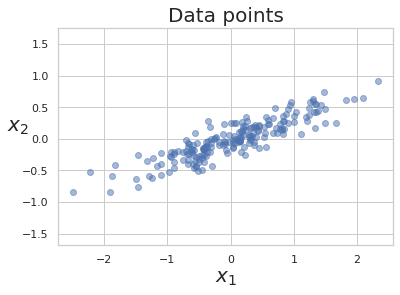

In [ ]:
#[Generate synthetic dataset]
rand = np.random.RandomState(1)
X = np.dot(rand.rand(2, 2), rand.randn(2, 200)).T

plt.figure()
plt.title('Data points', size = 20)

# set x and y labels
plt.xlabel('$x_1$', size=20)
plt.ylabel('$x_2$', size=20, rotation = 0)

# plot the data points
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.axis('equal')

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X),pca.components_,pca.explained_variance_,pca.mean_

# pca.explained_variance_:  array([0.7625315, 0.0184779]) i.e. first component
# captures 76% variance and the second component captures 1.8% variance
# first pc always in the direction of the first eigen-vector and captures max variance

(PCA(n_components=2), array([[-0.94446029, -0.32862557],
        [-0.32862557,  0.94446029]]), array([0.7625315, 0.0184779]), array([ 0.03351168, -0.00408072]))

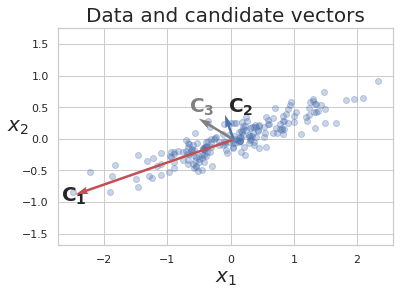

In [ ]:
#[Visualize principal components]

# set x and y labels

plt.figure()

plt.title('Data and candidate vectors', size = 20)

plt.xlabel('$x_1$', size=20)

plt.ylabel('$x_2$', size=20, rotation = 0)

# plot data points

plt.scatter(X[:, 0], X[:, 1], alpha=0.3)

for length, principal_axis, axis_name, i_color in zip(pca.explained_variance_, 

                                    pca.components_, 

                                    ['$\mathbf{C_1}$','$\mathbf{C_2}$'],

                                    ['r','b']):

    v = principal_axis * np.sqrt(length)

    v0, v1 = pca.mean_, pca.mean_ + v

    # draw principal axis

    plt.quiver(*v0,*(v1-v0),scale=0.33, scale_units='xy', color=i_color)

    # label the  principal axis

    plt.text(*(3.4*v1), axis_name, size = 20)

# draw 3rd component

lengths = np.eye(2)

np.fill_diagonal(lengths, np.sqrt(pca.explained_variance_))

c3 = pca.mean_+[-0.5,0.3]

plt.quiver(*pca.mean_,

           *(1.1*(c3-pca.mean_)),

           scale=1,

           scale_units='xy',

           color='grey')

# label the  principal axis

plt.text(*(1.4*c3), 

         '$\mathbf{C_3}$', 

         size = 20,

         color='grey')

plt.axis('equal')

plt.show()

In [ ]:
# Reducing dimensions

pca = PCA(n_components = 1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape: ", X.shape)
print("transformed shape: ", X_pca.shape)


original shape:  (200, 2)
transformed shape:  (200, 1)


## **Chaining Transformers**

Creating Pipelines

In [ ]:
from sklearn.pipeline import Pipeline
estimators=[
            ('simpleImputer',SimpleImputer()),
            ('standardScaler',StandardScaler()),    #final should implement fit
            ]
pipe=Pipeline(steps=estimators)

In [ ]:
from sklearn.pipeline import make_pipeline
pipe=make_pipeline(SimpleImputer(),StandardScaler())

In [ ]:
estimators=[('simpleImputer',SimpleImputer()),
            ('pca',PCA(n_components=2)),    #pipe.set_params(pca__n_components=2) 
            ('regressor',LinearRegression())
            ]
pipe=Pipeline(steps=estimators)


In [ ]:
pipe.steps

[('simpleImputer', SimpleImputer()),
 ('pca', PCA(n_components=2)),
 ('regressor', LinearRegression())]

In [ ]:
pipe.named_steps.pca

PCA(n_components=2)

Grid search with Pipeline

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = dict(imputer=['passthrough',        #dictionary with imputer/clf... as keys
                    SimpleImputer(),
                    KNNImputer()],
                    clf=[SVC(),LogisticRegression()],
                    clf__C=[0.1,10,100])
grid_search=GridSearchCV(pipe,param_grid=param_grid)

In [ ]:
dict(a = [1,2,3])

{'a': [1, 2, 3]}

Caching Transformers

In [ ]:
# caching results of intermediate trandformations
# helpful in grid search- need not recalculate for every configuration

import tempfile

tempDirPath=tempfile.TemporaryDirectory() #location

estimators=[('simpleImputer',SimpleImputer()),
            ('pca',PCA(2)),
            ('regressor',LinearRegression())
            ]
pipe=Pipeline(steps=estimators,memory=tempDirPath)

Feature Union

In [ ]:
# concatenates results of multiple transform onjects
# applies list of transformers objects in parallel and o/p concatenated

from sklearn.preprocessing import LabelBinarizer
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([('selector',ColumnTransformer([('select_first_4',
                                                        'passthrough',
                                                        slice(0,4))])),
                        ('imputer',SimpleImputer(strategy="median")),
                        ('std_scaler',StandardScaler()),
                        ])
cat_pipeline=ColumnTransformer([('label_binarizer',LabelBinarizer(),[4]),
                                ])
full_pipeline=FeatureUnion(transformer_list=
                            [("num_pipeline",num_pipeline),
                            ("cat_pipeline",cat_pipeline),
                            ])

In [ ]:
from sklearn import set_config
set_config(display='diagram')
full_pipeline

FeatureUnion(transformer_list=[('num_pipeline',
                                Pipeline(steps=[('selector',
                                                 ColumnTransformer(transformers=[('select_first_4',
                                                                                  'passthrough',
                                                                                  slice(0, 4, None))])),
                                                ('imputer',
                                                 SimpleImputer(strategy='median')),
                                                ('std_scaler',
                                                 StandardScaler())])),
                               ('cat_pipeline',
                                ColumnTransformer(transformers=[('label_binarizer',
                                                                 LabelBinarizer(),
                                                                 [4])]))])

## **Handling Imbalanced data**

In [ ]:
# might lead to overestimation/ underestimation
# 2 methods: oversampling, undersampling



In [ ]:
#Undersampling
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
X=wine_data.drop(['quality'],axis=1) #inplace = True will drop inplace
y=wine_data['quality']
undersample=RandomUnderSampler()
X_rus,y_rus=undersample.fit_resample(X,y)
Counter(y),Counter(y_rus)

(Counter({3: 10, 4: 53, 5: 681, 6: 638, 7: 199, 8: 18}),
 Counter({3: 10, 4: 10, 5: 10, 6: 10, 7: 10, 8: 10}))

In [ ]:
#Oversampling
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler()
X_ros,y_ros=ros.fit_resample(X,y)
Counter(y),Counter(y_ros)

(Counter({3: 10, 4: 53, 5: 681, 6: 638, 7: 199, 8: 18}),
 Counter({3: 681, 4: 681, 5: 681, 6: 681, 7: 681, 8: 681}))

In [ ]:
from imblearn.over_sampling import SMOTE   #synthetic minority oversampling
oversample=SMOTE()
X_sm,y_sm=oversample.fit_resample(X,y)
c=Counter(y_sm)
Counter(y),c

(Counter({3: 10, 4: 53, 5: 681, 6: 638, 7: 199, 8: 18}),
 Counter({3: 681, 4: 681, 5: 681, 6: 681, 7: 681, 8: 681}))